In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## BIRCH - balanced iterative and clustering using hierarchies

#### Cechy BIRCH:
* służy do **wstępnego** pogrupowania danych na dużo małych i bardzo spójnych skupień (następnie bierzemy środki tych klastrów, i używamy innego algorytmu klastrowania na nich)
* algorytm jest bardzo wydajny, przechodzimy przez dane tylko raz
* algorytm może zwrócić różne wyniki w zależności od kolejności danych 

#### Parametry:
* T(treshold), radius upper bound, (radius  = SREDNIA odleglosc punktow od srodka, a nie maksymalna, wiec inny promien niz klasyczny)
* B (branching factor): maksymalna dopuszczalna liczba gałęzi wychodząco z jednego węzła

In [4]:
from sklearn.cluster import Birch
from sklearn.datasets import make_blobs

# Zad.
Wygenerujmy dane zawierajęce 10 spójnych gróp.

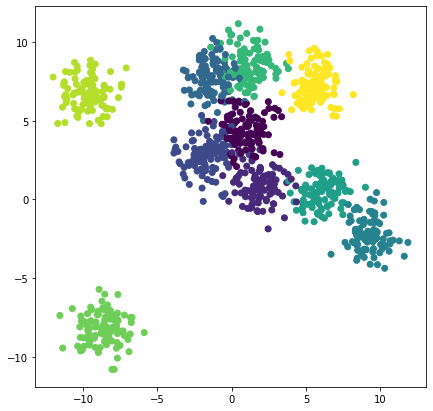

In [5]:
data, labels =  make_blobs(1000, centers = 10, random_state=0, shuffle=True)
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = labels, cmap = 'viridis')
plt.show()

# Zad.
Wykonaj algorytm  Birch

In [6]:
b = Birch(threshold = 1, n_clusters= None)
b.fit(data)

Birch(n_clusters=None, threshold=1)

In [7]:
b.subcluster_centers_

array([[  0.65699291,   8.00069438],
       [ -1.35867618,   2.55794936],
       [  0.3614498 ,   5.46440057],
       [  5.58257078,   0.29396862],
       [  0.25882045,   0.80899775],
       [  2.15510663,   2.1101151 ],
       [  7.31950896,   0.40489509],
       [  5.97039481,   7.91377766],
       [ -8.01415614,  -8.15111027],
       [ -9.71866948,   7.4970512 ],
       [  9.13401918,  -1.84849862],
       [  1.94821493,   4.69619738],
       [  1.94787564,   0.31134485],
       [  0.21674859,   3.64408369],
       [-10.11383596,   5.57292216],
       [ -1.50053598,   7.38181111],
       [  4.73076823,   6.64346277],
       [  5.9722929 ,   6.75365535],
       [ -9.89306681,  -8.44840359],
       [  2.19256109,   8.50320131],
       [ -8.6473362 ,   6.47515474],
       [ -8.78313524,  -6.79335004],
       [  4.15524325,   0.38318576],
       [  0.93226682,  10.06432171],
       [  6.20390339,   1.32105268],
       [  5.1467883 ,   9.08128783],
       [ -1.249771  ,   9.09356363],
 

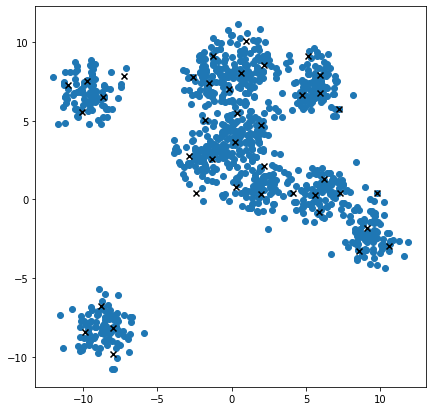

In [8]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1])
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

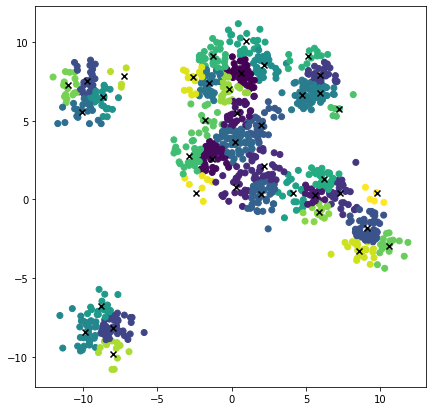

In [9]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = b.labels_, cmap = 'viridis')
plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

# Zad.
Wykonaj algorytm k-means na wyniku Birch.

In [10]:
from sklearn.cluster import KMeans

km = KMeans(3)

b = Birch(1, n_clusters = km) # n_clusters = algorithm means algorithm will be used 
                                     # to cluster subclusters obtained from Birch
b.fit(data)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Birch(n_clusters=KMeans(n_clusters=3), threshold=1)

In [11]:
km.labels_

array([1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 1, 2, 2, 0, 1, 1, 0,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2])

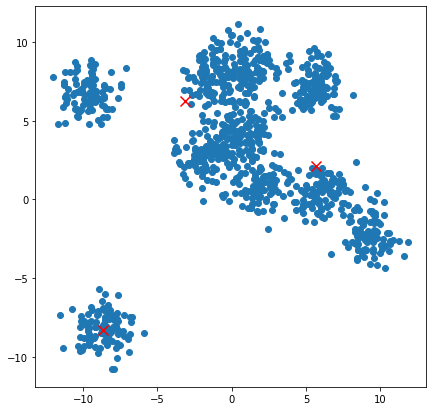

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1])
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', marker = 'x')
plt.show()

In [13]:
labels_all = km.predict(data)

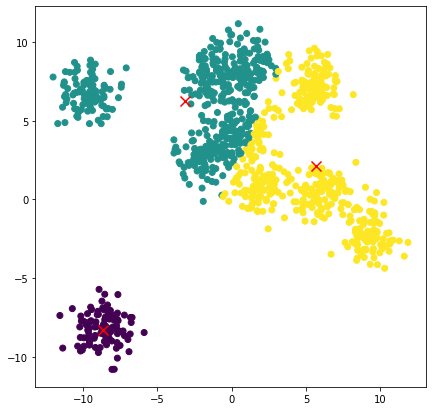

In [14]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c=labels_all)
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s = 100, c = 'red', marker = 'x')
plt.show()

## 10^6 examples

In [15]:
N_CLUSTERS = 500
data, labels = make_blobs(100000, centers= N_CLUSTERS, cluster_std = 4, center_box = [0,1000], random_state = 0, shuffle = True)

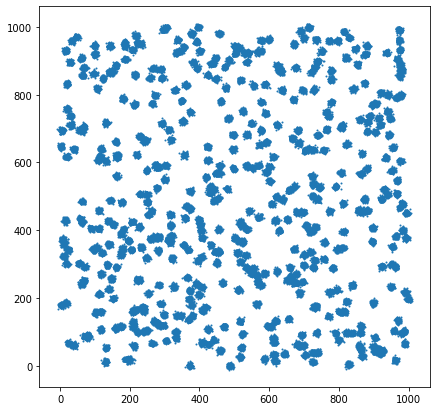

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], s = 1)
plt.show()

In [17]:
b  = Birch(4, n_clusters = 500, branching_factor = 1000)
b.fit(data)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Birch(branching_factor=1000, n_clusters=500, threshold=4)

In [18]:
len(b.subcluster_centers_)

2978

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass threshold=4 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


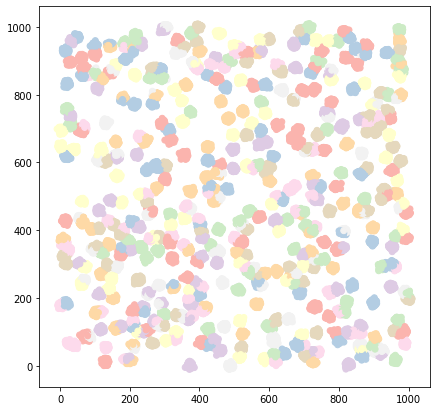

In [19]:
b  = Birch(4, n_clusters = 500, branching_factor = 1000)
b.fit(data)

plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = b.labels_, cmap = 'Pastel1')
#plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()

# MiniBatch Kmeans

   * Algorytm pobiera małe partie zbioru danych (losowo wybrane) dla każdej iteracji.

   * Następnie przypisuje klaster do każdego punktu danych w grupie, w zależności od poprzednich lokalizacji centroidów klastra.

   * Następnie aktualizuje położenie centroidów klastra na podstawie nowych punktów z partii. 

   * Aktualizacja wykonywana jest za pomocą metody gradientowwj, która jest znacznie szybsza niż zwykła aktualizacja Batch K-Means. 
   
   
http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf   

In [20]:
from sklearn.cluster import MiniBatchKMeans, KMeans

In [21]:
m_n_k_means = MiniBatchKMeans(n_clusters=500, batch_size= 1000)
m_n_k_means.fit(data)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:888: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  f"MiniBatchKMeans is known to have a memory leak on "


MiniBatchKMeans(batch_size=1000, n_clusters=500)

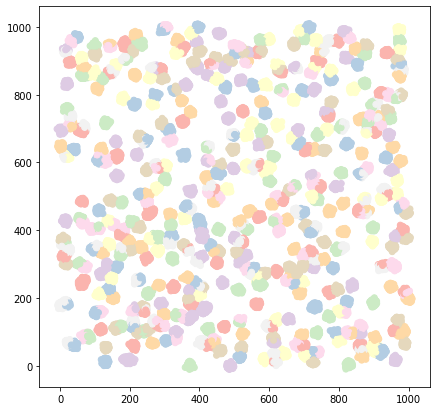

In [22]:
plt.figure(figsize=(7,7))
plt.scatter(data[:,0],data[:,1], c = m_n_k_means.labels_, cmap = 'Pastel1')
#plt.scatter(b.subcluster_centers_[:,0],b.subcluster_centers_[:,1], c = 'black', marker = 'x')
plt.show()